# Task Time Estimates

In [116]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
import math
import seaborn as sns

In [117]:
df = pd.read_csv("../data/timeseries_base.csv", index_col = None, parse_dates = True)

In [118]:
# Updating week to be a date instead of object.
# Parse Dates doesn't work reliably. Will add other columns as needed

df['week'] = pd.to_datetime(df['week'])

In [119]:
df.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,first_week_regular,len_of_stay,admitdate,dischargedate,admit_week_days,discharge_week_days,discharge_plus_admit,admit,regular,discharge,week_admit,week_discharge
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,3,17,2019-01-01,2019-01-18,6,5,11,1.0,0.428571,0.0,1,0
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,3,16,2019-01-01,2019-01-17,6,4,10,1.0,0.428571,0.0,1,0
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,3,30,2019-01-01,2019-01-31,6,4,10,1.0,0.428571,0.0,1,0
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,3,15,2019-01-01,2019-01-16,6,3,9,1.0,0.428571,0.0,1,0
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,3,7,2019-01-01,2019-01-08,6,2,8,1.0,0.428571,0.0,1,0


In [120]:
len(df)

150089

#### Assuming a "normal" distribution, take the mean of 1000 draws of the time estimates. Use the mode as the mean and the range/4 as the standard deviation

In [121]:
Task1 = 2.12
Task2 = 4.95
Task3 = 61.67
Task4 = 10.04
Task5 = 7.95
Task6 = 10.08
Task7 = 5
Task8 = 6.99
Task9 = 4.03
Task10 = 16.54
Task11 = 37.1
Task12 = 5.04
Task13 = 5
Task14 = 6.34
Task15 = 14.99
Task16 = 10
Task17 = 3

### Contract Type 1

In [122]:
#if including remote workers. Replacing in person task 13 with remote task 17 bc it is more efficient
df.loc[df['contracttype'] == 'CT1', 'regular_time'] = df['regular']*(Task9 + Task12 + Task15 + Task14)
df.loc[df['contracttype'] == 'CT1', 'discharge_time'] = df['discharge']*(Task2 + Task8)
df.loc[df['contracttype'] == 'CT1', 'admit_time'] = df['admit']*(Task1 + Task4 + Task5 + Task6)
df.loc[df['contracttype'] == 'CT1', 'remote_time'] = df['regular']*(Task17)

### Contract Type 2

In [123]:
#if including remote workers. Replacing in person task 13 with remote task 17 bc it is more efficient
df.loc[df['contracttype'] == 'CT2', 'regular_time'] = df['regular']*(Task9 + Task11 + Task14)
df.loc[df['contracttype'] == 'CT2', 'discharge_time'] = df['discharge']*(Task7 + Task8 + Task2 + Task10)
df.loc[df['contracttype'] == 'CT2', 'admit_time'] = df['admit']*(Task1 + Task3 + Task5 + Task6)
df.loc[df['contracttype'] == 'CT2', 'remote_time'] = df['regular']*(Task17)

In [124]:
df['onsite_time'] = df['regular_time'] + df['discharge_time'] + df['admit_time']

In [125]:
# Rounding to nearest 10th
df['admit_time'] = df['admit_time'].round(2)
df['remote_time'] = df['remote_time'].round(2)
df['onsite_time'] = df['onsite_time'].round(2)

In [126]:
df.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,first_week_regular,len_of_stay,...,admit,regular,discharge,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,3,17,...,1.0,0.428571,0.0,1,0,20.344286,0.0,81.82,1.29,102.16
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,3,16,...,1.0,0.428571,0.0,1,0,20.344286,0.0,81.82,1.29,102.16
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,3,30,...,1.0,0.428571,0.0,1,0,20.344286,0.0,81.82,1.29,102.16
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,3,15,...,1.0,0.428571,0.0,1,0,20.344286,0.0,81.82,1.29,102.16
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,3,7,...,1.0,0.428571,0.0,1,0,20.344286,0.0,81.82,1.29,102.16


## Total Hours

In [127]:
# convert time from minutes to hours
df['onsite_hours'] = np.round(df['onsite_time']/60, 2)
df['remote_hours'] = np.round(df['remote_time']/60, 2)

In [128]:
df['onsite_hours'].sum()

134331.13999999998

In [129]:
grouped = df.groupby('county')

In [130]:
grouped.sum()

,pid,episodeid,providerpracticezipcode,first_week_regular,len_of_stay,admit_week_days,discharge_week_days,discharge_plus_admit,admit,regular,discharge,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time,onsite_hours,remote_hours
county,,,,,,,,,,,,,,,,,,,,
Anderson,409895,7936777,22210317,346,6265,1130,1109,2239,87.0,189.285714,87.0,87,87,8985.392857,2912.76,7118.34,567.96,19016.33,316.68,9.41
Andrews,8057,298018,557998,0,301,14,49,63,1.0,5.000000,1.0,1,1,237.350000,33.48,81.82,14.99,352.66,5.88,0.24
Angelina,890796,40135485,77654114,1409,28290,4060,4078,8138,277.0,717.000000,277.0,277,277,28956.445714,7421.52,18223.96,2151.07,54601.55,910.26,36.13
Aransas,110199,4775695,10111278,169,3282,512,470,982,37.0,83.428571,37.0,37,37,3745.760000,1217.22,2975.71,250.34,7938.60,132.28,4.15
Archer,184,136588,305404,0,80,4,24,28,1.0,2.285714,1.0,1,1,108.502857,33.48,81.82,6.85,223.80,3.73,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wise,745454,9119158,40366378,719,18267,2149,1926,4075,128.0,376.000000,128.0,128,128,16346.560000,4091.58,10008.29,1128.14,30446.34,507.36,18.63
Wood,290188,5343287,14364408,309,4325,818,715,1533,59.0,122.857143,59.0,59,59,5671.082857,1846.08,4517.60,368.59,12034.71,200.53,6.15
Yoakum,40962,1007809,1903752,14,400,83,131,214,8.0,13.571429,8.0,8,8,644.235714,267.84,654.56,40.69,1566.66,26.08,0.69


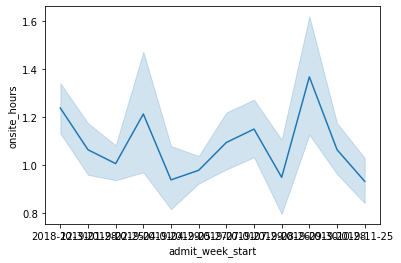

In [131]:
#look at one county
brazos = df[df['county'] == 'Brazos']
from seaborn import lineplot
lineplot(x='admit_week_start', y='onsite_hours', data=brazos);

#### We are going to use the first 3 months of the year to make recommendations. This is due to the fact that we can assume there is seasonality within the data where at the beginning of the year, many more patients are admitted to the snf's and nearing the end of the year, this number drops off. So, first we need to roll up weekly data into a monthly level.

In [132]:
grouped = df.groupby(['county', 'admit_week_start'])

#### Using admit week start creates an issue in that there are no values returned for march. All patients that were admitted on 3/1 had a week start in Feb. and all patients admitted on 4/1 had a week start in April so no weeks actually started in March. Need to use admit date instead

In [133]:
grouped.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,first_week_regular,len_of_stay,...,discharge,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time,onsite_hours,remote_hours
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,3,17,...,0.0,1,0,20.344286,0.00,81.82,1.29,102.16,1.70,0.02
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,3,16,...,0.0,1,0,20.344286,0.00,81.82,1.29,102.16,1.70,0.02
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,3,30,...,0.0,1,0,20.344286,0.00,81.82,1.29,102.16,1.70,0.02
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,3,15,...,0.0,1,0,20.344286,0.00,81.82,1.29,102.16,1.70,0.02
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,3,7,...,0.0,1,0,20.344286,0.00,81.82,1.29,102.16,1.70,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147919,2019-12-23,398,34449,CT2,Comanche,76444,2019-11-25,2019-12-23,0,23,...,1.0,0,1,13.562857,33.48,0.00,0.86,47.04,0.78,0.01
147921,2019-12-23,415,54202,CT1,Tyler,75979,2019-11-25,2020-03-09,0,100,...,0.0,0,0,21.714286,0.00,0.00,2.14,21.71,0.36,0.04
147987,2019-12-23,555,35373,CT2,Gonzales,78629,2019-11-25,2019-12-23,0,24,...,1.0,0,1,20.344286,33.48,0.00,1.29,53.82,0.90,0.02
148047,2019-12-23,702,34658,CT2,Houston,75835,2019-11-25,2019-12-23,0,26,...,1.0,0,1,33.907143,33.48,0.00,2.14,67.39,1.12,0.04


In [134]:
df['month'] = pd.DatetimeIndex(df['admitdate']).month

#### Based on overall trends in the data, we have decided to only use the first 3 months for staffing. This also makes sense given the fact that the data stops in December and we need to decide our next staffing numbers

In [135]:
months = [1, 2, 3]
df = df[df.month.isin(months)]

In [136]:
df.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,first_week_regular,len_of_stay,...,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time,onsite_hours,remote_hours,month
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,3,17,...,1,0,20.344286,0.0,81.82,1.29,102.16,1.7,0.02,1
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,3,16,...,1,0,20.344286,0.0,81.82,1.29,102.16,1.7,0.02,1
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,3,30,...,1,0,20.344286,0.0,81.82,1.29,102.16,1.7,0.02,1
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,3,15,...,1,0,20.344286,0.0,81.82,1.29,102.16,1.7,0.02,1
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,3,7,...,1,0,20.344286,0.0,81.82,1.29,102.16,1.7,0.02,1


In [137]:
# Group by --- County + week
# Group by Month

#### actually only need to group by county and get the mean of these three months. here, sum is the total number of hours over the three months and mean is the average time per patient in the month

In [138]:
df.groupby('county', as_index=False).onsite_hours.agg(['sum', 'mean'])

,sum,mean
county,,
Anderson,114.44,1.040364
Angelina,228.90,0.897647
Aransas,33.18,1.070323
Atascosa,88.17,0.958370
Austin,21.33,1.015714
...,...,...
Winkler,3.16,1.580000
Wise,170.55,0.937088
Wood,40.10,1.083784


In [139]:
# Onsite hours by month, by county for Jan, Feb, Mar (each seperately)
sums = df.groupby(['county', 'month'])[['onsite_hours']].sum().reset_index()

In [140]:
# Avg Monthly onsite hours across each of the first three months of the year
county_avg = sums.groupby('county')['onsite_hours'].mean().reset_index()

In [141]:
county_avg['onsite_hours'].min()

1.49

In [142]:
county_avg['onsite_hours'].max()

1957.4666666666628

In [143]:
#per week how many hours by county in the first 3 months of the year
county_avg['weekly_avg'] = county_avg['onsite_hours']/4

In [144]:
county_avg['fte_avg'] = round(county_avg['weekly_avg'] / 40, 2)

In [145]:
county_avg.sort_values(by=['fte_avg'], ascending = False).head(30)

,county,onsite_hours,weekly_avg,fte_avg
73,Harris,1957.466667,489.366667,12.23
40,Dallas,1171.063333,292.765833,7.32
159,Tarrant,897.646667,224.411667,5.61
33,Collin,595.926667,148.981667,3.72
11,Bexar,501.103333,125.275833,3.13
152,Smith,363.156667,90.789167,2.27
56,Fort Bend,322.666667,80.666667,2.02
43,Denton,285.210000,71.302500,1.78
48,El Paso,281.836667,70.459167,1.76
164,Travis,247.940000,61.985000,1.55


(array([155.,  13.,   7.,   4.,   3.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e-02, 4.17333333e-01, 8.24666667e-01, 1.23200000e+00,
        1.63933333e+00, 2.04666667e+00, 2.45400000e+00, 2.86133333e+00,
        3.26866667e+00, 3.67600000e+00, 4.08333333e+00, 4.49066667e+00,
        4.89800000e+00, 5.30533333e+00, 5.71266667e+00, 6.12000000e+00,
        6.52733333e+00, 6.93466667e+00, 7.34200000e+00, 7.74933333e+00,
        8.15666667e+00, 8.56400000e+00, 8.97133333e+00, 9.37866667e+00,
        9.78600000e+00, 1.01933333e+01, 1.06006667e+01, 1.10080000e+01,
        1.14153333e+01, 1.18226667e+01, 1.22300000e+01]),
 <a list of 30 Patch objects>)

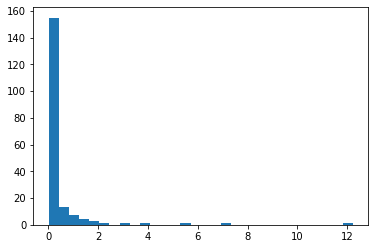

In [146]:
plt.hist(county_avg["fte_avg"], bins = 30)

#add another hist 0-2

#### Let's zoom in on just the 0-2 range

(array([65., 37., 21., 17.,  2.,  5.,  8.,  3.,  4.,  0.,  1.,  2.,  3.,
         1.,  0.,  0.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  2.]),
 array([0.01 , 0.069, 0.128, 0.187, 0.246, 0.305, 0.364, 0.423, 0.482,
        0.541, 0.6  , 0.659, 0.718, 0.777, 0.836, 0.895, 0.954, 1.013,
        1.072, 1.131, 1.19 , 1.249, 1.308, 1.367, 1.426, 1.485, 1.544,
        1.603, 1.662, 1.721, 1.78 ]),
 <a list of 30 Patch objects>)

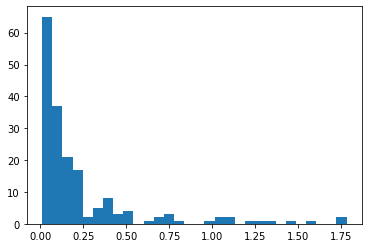

In [174]:
lowest_counties = county_avg.loc[(county_avg['fte_avg'] < 2)]
plt.hist(lowest_counties["fte_avg"], bins = 30)

#### Most counties lie within the 0-2 CC range with only a few from ~3-7 and one requiring approx. 12 CC's

In [147]:
county_avg.shape

(188, 4)

#### There are 188 counties that had patients in the first 3 months of the year

In [148]:
top_5 = county_avg.sort_values(by=['onsite_hours'], ascending = False).head(5)
top_5

,county,onsite_hours,weekly_avg,fte_avg
73,Harris,1957.466667,489.366667,12.23
40,Dallas,1171.063333,292.765833,7.32
159,Tarrant,897.646667,224.411667,5.61
33,Collin,595.926667,148.981667,3.72
11,Bexar,501.103333,125.275833,3.13


In [149]:
round(top_5['onsite_hours'].agg('sum'),2)/round(county_avg['onsite_hours'].agg('sum'),2)

0.4083276944498243

#### 40.8% of the total hours spent onsite in the entire state come from the top 5 counties. There are 188 total counties -- these 5 counties account for 2.7% of the total number of counties but 40.8% of the hours

In [150]:
round(county_avg['fte_avg'].agg('sum'),2)

78.4

#### In the whole state, there are 79 CC's required to complete the necessary tasks at the SNF's. 32 of them are needed in the top 5 counties

In [151]:
round(top_5['fte_avg'].agg('sum'),2)

32.01

#### We decided that for any county requiring .5 up to 1 full time employee, we will staff one full time employee. For counties with over 1 FTE required, we will round up to the nearest number of employees. For any county between .3-.5 FTE, we will hire part time or contract workers in those counties. For any county with FTE needs less than .3 but greater than .1, we will either a) rely on primarily remote workers who can come in and help with excess need or b) group adjacent counties and have one CC staffed across that group (where possible). Next step - use lat/long to group counties based on some distance metric to do this grouping. For counties with needs less than .1, we do not have a clear solution at the moment given the level of granularity present in the data

### Highest 1/3 of data in terms of FTE needs

#### Here, we separate out all counties that require at least .5 full time employees and round up to the next integer

In [152]:
top_third = county_avg[county_avg['fte_avg']>=.5]

In [153]:
#add .5 so that we round up for each int value
top_third['total_onsite_employees'] = round(top_third['fte_avg'] + .5,0)

<ipython-input-153-84623cf97fb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_third['total_onsite_employees'] = round(top_third['fte_avg'] + .5,0)


In [154]:
top_third

,county,onsite_hours,weekly_avg,fte_avg,total_onsite_employees
11,Bexar,501.103333,125.275833,3.13,4.0
14,Brazoria,99.463333,24.865833,0.62,1.0
24,Cameron,195.383333,48.845833,1.22,2.0
33,Collin,595.926667,148.981667,3.72,4.0
40,Dallas,1171.063333,292.765833,7.32,8.0
43,Denton,285.210000,71.302500,1.78,2.0
48,El Paso,281.836667,70.459167,1.76,2.0
49,Ellis,111.553333,27.888333,0.70,1.0
56,Fort Bend,322.666667,80.666667,2.02,3.0
60,Galveston,208.570000,52.142500,1.30,2.0


### Middle 1/3 in terms of FTE needs

#### Here, we will separate out the full time employees between .3 and .5 to assign a number of part time or contract workers

In [156]:
middle_third = county_avg.loc[(county_avg['fte_avg'] < .5) & (county_avg['fte_avg'] >= .3)]

In [157]:
middle_third['total_parttime_employees'] = round(middle_third['fte_avg'] + .5,0)

<ipython-input-157-28ebcfcbf56d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_third['total_parttime_employees'] = round(middle_third['fte_avg'] + .5,0)


In [158]:
middle_third

,county,onsite_hours,weekly_avg,fte_avg,total_parttime_employees
1,Angelina,76.300000,19.075000,0.48,1.0
10,Bell,68.250000,17.062500,0.43,1.0
13,Bowie,77.936667,19.484167,0.49,1.0
15,Brazos,63.130000,15.782500,0.39,1.0
35,Comal,65.793333,16.448333,0.41,1.0
37,Cooke,61.983333,15.495833,0.39,1.0
76,Hays,51.676667,12.919167,0.32,1.0
77,Henderson,74.676667,18.669167,0.47,1.0
81,Hood,60.110000,15.027500,0.38,1.0
97,Kerr,62.883333,15.720833,0.39,1.0


### Bottom 1/3 in terms of FTE needs

In [170]:
bottom_third = county_avg.loc[(county_avg['fte_avg'] < .3) & (county_avg['fte_avg'] >= .1)]

In [171]:
bottom_third['total_grouped_workers'] = round(bottom_third['fte_avg'] + .5,0)

<ipython-input-171-02645f3d4fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_third['total_grouped_workers'] = round(bottom_third['fte_avg'] + .5,0)


In [172]:
bottom_third

,county,onsite_hours,weekly_avg,fte_avg,total_grouped_workers
0,Anderson,38.146667,9.536667,0.24,1.0
3,Atascosa,29.390000,7.347500,0.18,1.0
7,Bastrop,30.993333,7.748333,0.19,1.0
18,Brown,19.486667,4.871667,0.12,1.0
19,Burleson,15.386667,3.846667,0.10,1.0
20,Burnet,17.060000,4.265000,0.11,1.0
21,Caldwell,22.753333,5.688333,0.14,1.0
26,Cass,37.910000,9.477500,0.24,1.0
29,Cherokee,28.276667,7.069167,0.18,1.0
38,Coryell,19.450000,4.862500,0.12,1.0


In [162]:
round(142/188, 3)

0.755

#### 75% of counties have less than .3 onsite workers needed